In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import h5py

In [2]:
#define PCHANNEL_WIDTH 16.0*0.06103515625 /* MHz */
#define PNUMBER_OF_CHANNELS 41 
#define PSTART_FREQUENCY 210.44921875 /* MHz */

#define RCHANNEL_WIDTH 16.0*0.06103515625 /* MHz */
#define RNUMBER_OF_CHANNELS 103 
#define RSTART_FREQUENCY 109.86328125 /* MHz */

#define QCHANNEL_WIDTH 16.0*0.06103515625 /* MHz */
#define QNUMBER_OF_CHANNELS 72 
#define QSTART_FREQUENCY 39.5507812500 /* MHz */

In [3]:
PATH = "/Users/jishnu/codespace/spcgen_saras3/"
fname_p = "total_model_spec_31jan17_210_250_16spacing.txt" #P?
fname_r = "total_model_spec_13jan17_3072pix_103fq.txt" #R?
fname_q = "total_model_spec_24jan17_1_3072_freq_40_110_MHz_16spacing.txt" #Q?

map_data_p = np.loadtxt(PATH+fname_p, skiprows=1)
map_data_q = np.loadtxt(PATH+fname_q, skiprows=1)
map_data_r = np.loadtxt(PATH+fname_r, skiprows=1)

print (map_data_p.shape)
freq_q = np.linspace(39.550781250, 39.550781250 + 72*16.0*0.06103515625, 72)
freq_r = np.linspace(109.86328125, 109.86328125 + 103*16.0*0.06103515625, 103)
freq_p = np.linspace(210.44921875, 210.44921875 + 41*16.0*0.06103515625, 41)

(3072, 41)


In [4]:
freq_MHz = np.concatenate((freq_q, freq_r, freq_p))
maps_K = np.concatenate((map_data_q, map_data_r, map_data_p), axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/healpy/projaxes.py:907: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/healpy/projaxes.py:908: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/healpy/projaxes.py:909: MatplotlibDeprecationWarning: You are modifying the state of a

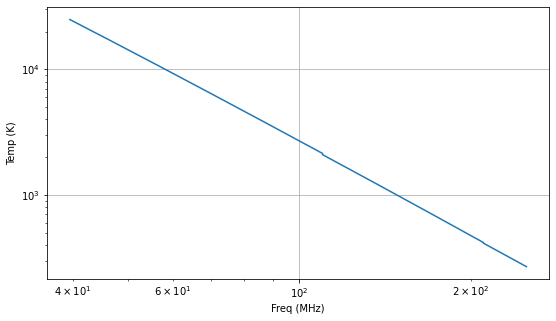

<Figure size 432x288 with 0 Axes>

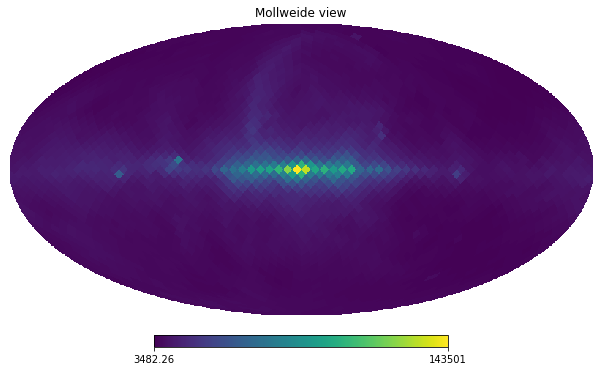

In [10]:
#Sanity checks

plt.figure(figsize=(9,5))
plt.loglog(freq_MHz, maps_K[3,:])
plt.xlabel("Freq (MHz)")
plt.ylabel("Temp (K)")
plt.grid()

plt.figure()
hp.mollview(maps_K[:,0], nest=True)


In [11]:
hf = h5py.File('GMOSS_maps.h5', 'w')
hf.create_dataset('maps', data=maps_K)
hf.create_dataset('freq', data=freq_MHz)
hf.close()